In [2]:
import pandas as pd
import numpy as np 
import os, time 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor, plot_importance
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error as MAE, r2_score as R2, mean_squared_error as MSE

In [3]:
Data_pivot = pd.read_excel('D:\\Air_Quality_health_Project\\data\\clean_data\\Data_pivot.xlsx')

In [4]:
Data_pivot.head()

,State,Month,co µg/m³,no2 µg/m³,pm10 µg/m³,pm25 µg/m³,so2 µg/m³,Asthama_Cases,Bronchitis_Cases,Heart_attacks,COPD_Cases,Neumonia_Cases,Pollution_index,Disease_index,Pollution_category
0,Odisha,4,1256.50,4.87,99.05,50.00,3.08,10.370370,11.900000,2.407407,20.111111,7.222222,282.700,10.402222,Poor
1,Kerala,9,826.75,8.87,26.96,15.46,4.10,11.851852,11.900000,2.314815,22.629630,13.240741,176.428,12.387407,Moderate
2,Meghalaya,7,120.00,2.76,6.86,6.14,4.11,161.777778,24.305556,11.805556,16.666667,4.722222,27.974,43.855556,Good
3,Kerala,10,1054.00,11.00,51.16,23.41,4.40,14.814815,15.300000,2.407407,25.166667,8.425926,228.794,13.222963,Poor
4,Mizoram,7,128.00,0.19,6.49,0.39,4.44,5.925926,10.200000,2.129630,17.601852,16.851852,27.902,10.541852,Good


In [8]:
Data_pivot.sort_values(by= 'so2 µg/m³')

,State,Month,co µg/m³,no2 µg/m³,pm10 µg/m³,pm25 µg/m³,so2 µg/m³,Asthama_Cases,Bronchitis_Cases,Heart_attacks,COPD_Cases,Neumonia_Cases,Pollution_index,Disease_index,Pollution_category
0,Odisha,4,1256.50,4.87,99.05,50.00,3.08,10.370370,11.900000,2.407407,20.111111,7.222222,282.700,10.402222,Poor
1,Kerala,9,826.75,8.87,26.96,15.46,4.10,11.851852,11.900000,2.314815,22.629630,13.240741,176.428,12.387407,Moderate
2,Meghalaya,7,120.00,2.76,6.86,6.14,4.11,161.777778,24.305556,11.805556,16.666667,4.722222,27.974,43.855556,Good
3,Kerala,10,1054.00,11.00,51.16,23.41,4.40,14.814815,15.300000,2.407407,25.166667,8.425926,228.794,13.222963,Poor
4,Mizoram,7,128.00,0.19,6.49,0.39,4.44,5.925926,10.200000,2.129630,17.601852,16.851852,27.902,10.541852,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Maharashtra,4,529.47,11.30,159.06,233.08,39.47,10.370370,11.900000,2.407407,20.111111,7.222222,194.476,10.402222,Moderate
231,Haryana,7,536.52,15.78,79.29,39.18,40.14,5.925926,10.200000,2.129630,17.601852,16.851852,142.182,10.541852,Moderate
232,Punjab,5,455.00,14.71,87.21,39.53,71.11,8.888889,10.200000,2.314815,17.601852,8.425926,133.512,9.486296,Moderate
233,Andhra Pradesh,12,895.75,23.82,124.20,71.62,103.28,13.333333,18.700000,2.222222,32.694444,7.222222,243.734,14.834444,Poor


In [5]:
Data_pivot.shape

(235, 15)

In [6]:
# Column groups
categorical_features = ['State']
ordinal_feature = ['Pollution_category']
month_feature = ['Month']
numerical_features = [ 'co µg/m³', 'no2 µg/m³', 'pm10 µg/m³', 'pm25 µg/m³','so2 µg/m³']

In [7]:
pollution_order = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']

In [8]:
X_temp = Data_pivot.drop(columns=['Asthama_Cases', 'Bronchitis_Cases', 'Heart_attacks', 'COPD_Cases', 'Neumonia_Cases', 'Pollution_index', 'Disease_index', 'Pollution_category'])
X_temp.head()

,State,Month,co µg/m³,no2 µg/m³,pm10 µg/m³,pm25 µg/m³,so2 µg/m³
0,Odisha,4,1256.50,4.87,99.05,50.00,3.08
1,Kerala,9,826.75,8.87,26.96,15.46,4.10
2,Meghalaya,7,120.00,2.76,6.86,6.14,4.11
3,Kerala,10,1054.00,11.00,51.16,23.41,4.40
4,Mizoram,7,128.00,0.19,6.49,0.39,4.44


In [9]:
X = Data_pivot.drop(columns=['Asthama_Cases', 'Bronchitis_Cases', 'Heart_attacks', 'COPD_Cases', 'Neumonia_Cases', 'Pollution_index', 'Disease_index', 'Pollution_category'])
Asthama_Cases = Data_pivot[['Asthama_Cases']]
Bronchitis_Cases = Data_pivot[['Bronchitis_Cases']]
Heart_attacks = Data_pivot[['Heart_attacks']]
COPD_Cases = Data_pivot[['COPD_Cases']]
Neumonia_Cases = Data_pivot[['Neumonia_Cases']]

In [10]:
X_train, X_test, Asthama_train, Asthama_test, Bronchitis_train, Bronchitis_test, Heart_attacks_train, Heart_attacks_test, COPD_train, COPD_test, Neumonia_train, Neumonia_test  = train_test_split(
    X,
    Asthama_Cases, Bronchitis_Cases, Heart_attacks, COPD_Cases, Neumonia_Cases,
    test_size=0.2,
    random_state=42
    )

In [11]:
class CyclicEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, max_value=12, prefix='month'):
        self.max_value = max_value
        self.prefix = prefix

    def fit(self, X, y=None):
        return self

    def transform(self, X):
         # Convert to numeric numpy array (even if it's string month names like "January")
        if isinstance(X, pd.DataFrame):
            X_array = X.iloc[:, 0].astype(float).to_numpy()
        elif isinstance(X, pd.Series):
            X_array = X.astype(float).to_numpy()
        else:
            X_array = np.array(X, dtype=float).ravel()
        radians = 2 * np.pi * X_array / self.max_value
        return np.c_[np.sin(radians), np.cos(radians)]

    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            input_features = [self.prefix]
        return [f"{input_features[0]}_sin", f"{input_features[0]}_cos"]


In [12]:
preprocessor = ColumnTransformer(
    transformers=[
        ('state', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('month', CyclicEncoder(), month_feature),
        # ('pollution', OrdinalEncoder(categories=[pollution_order]), ordinal_feature),
        ('numeric',StandardScaler() ,numerical_features)
    ],
    sparse_threshold=0,
    remainder='passthrough'
)

In [13]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [14]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(MSE(y_test, y_pred))
    mae = MAE(y_test, y_pred)
    r2 =  R2(y_test, y_pred)
    
    return {
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    }

In [15]:
def model_comparison( X_train, X_test, y_train, y_test):
    results = []

    model = [
        ('Linear Regression' , MultiOutputRegressor(LinearRegression())),
        ('Ridge Regression', MultiOutputRegressor(Ridge(alpha = 1.0, max_iter = 2000))),
        ('Lasso Regression', MultiOutputRegressor(Lasso(alpha = 0.1, max_iter = 2000))),
        ('Random Forest Regression', MultiOutputRegressor(RandomForestRegressor())),
        ('XGBoost Regression', MultiOutputRegressor(XGBRegressor()))
    ]

    for name, model in model:
        res = evaluate_model(name, model, X_train, y_train, X_test, y_test)
        results.append(res)
        
    return pd.DataFrame(results).sort_values(by='RMSE')

In [16]:
tests = [
    (Asthama_train, Asthama_test, 'Asthama_Cases'),
    (Bronchitis_train, Bronchitis_test, 'Bronchitis_Cases'),
    (Heart_attacks_train, Heart_attacks_test, 'Heart_attacks'),
    (COPD_train, COPD_test, 'COPD'),
    (Neumonia_train, Neumonia_test, 'Neumonia_Cases')
]
for y_train, y_test, name in tests:
    results_df = model_comparison(X_train, X_test, y_train, y_test)
    print('The metrices for ', name)
    print(results_df)

The metrices for  Asthama_Cases
                      Model       RMSE       MAE        R²
4        XGBoost Regression   7.662990  1.640370  0.974454
3  Random Forest Regression   8.004050  2.607360  0.972129
0         Linear Regression   8.929375  5.769518  0.965312
2          Lasso Regression   9.037726  5.215046  0.964465
1          Ridge Regression  12.940147  8.188244  0.927153
The metrices for  Bronchitis_Cases
                      Model      RMSE       MAE        R²
4        XGBoost Regression  1.097937  0.238995  0.987008
3  Random Forest Regression  2.373072  0.647909  0.939308
0         Linear Regression  2.826007  1.544492  0.913929
2          Lasso Regression  3.068762  1.665929  0.898507
1          Ridge Regression  3.380535  1.899716  0.876836
The metrices for  Heart_attacks
                      Model      RMSE       MAE        R²
4        XGBoost Regression  0.420315  0.138767  0.984607
3  Random Forest Regression  0.436128  0.147995  0.983427
0         Linear Regressi

In [17]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           scoring='r2',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

In [18]:
best_estimator = {}
for y_train, y_test, name in tests:
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_model.get_booster().feature_names = list(preprocessor.get_feature_names_out())
    
    best_estimator[name] = best_model
    

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits


<Figure size 1000x600 with 0 Axes>

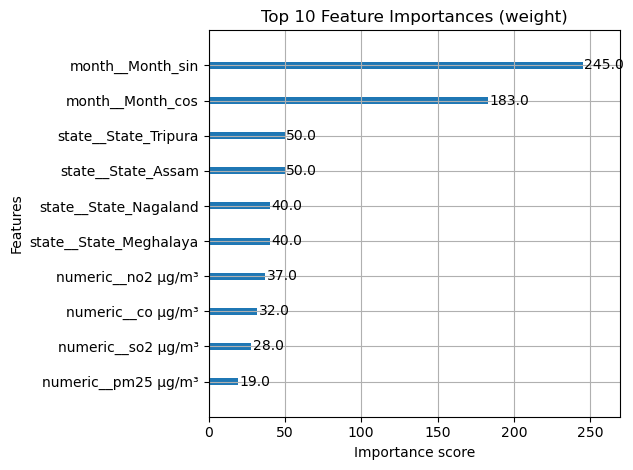

<Figure size 1000x600 with 0 Axes>

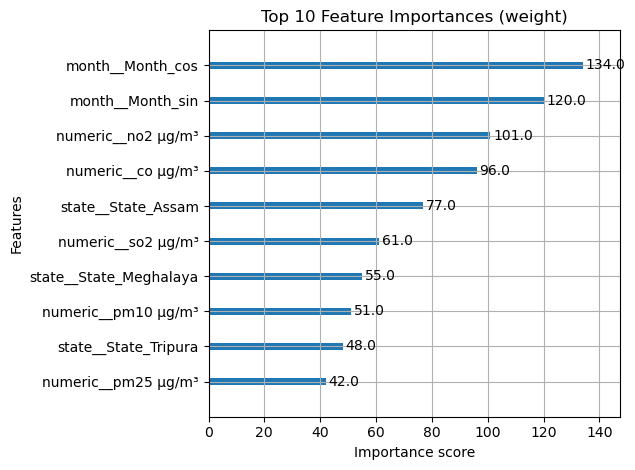

<Figure size 1000x600 with 0 Axes>

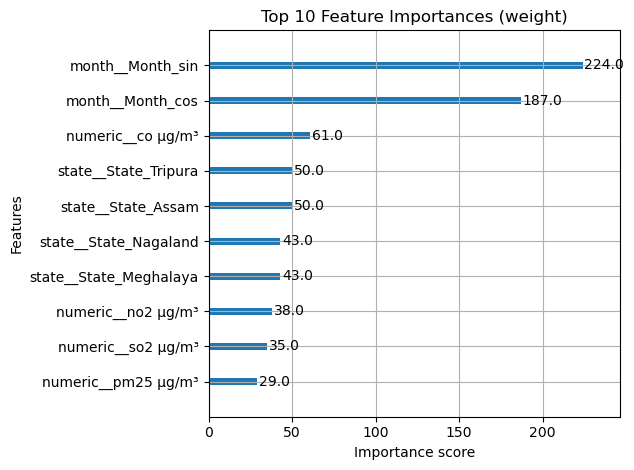

<Figure size 1000x600 with 0 Axes>

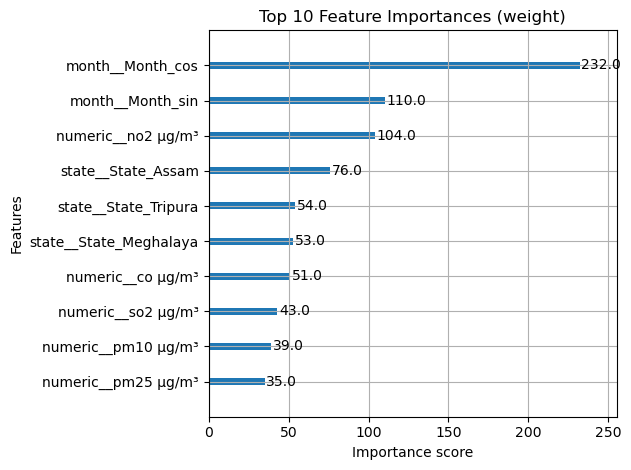

<Figure size 1000x600 with 0 Axes>

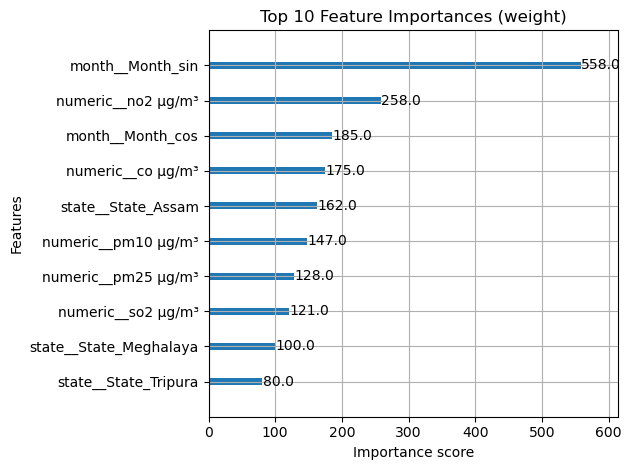

In [19]:
for d in best_estimator.values(): 
    plt.figure(figsize=(10, 6))
    plot_importance(d,  max_num_features=10, importance_type= 'weight')
    plt.title("Top 10 Feature Importances (weight)")
    plt.tight_layout()
    plt.show()

In [20]:
import pickle as pkl
preprocessor_path = 'preprocessor.pkl'
with open(preprocessor_path, 'rb') as f:
    prep = pkl.load(f)

In [21]:
preprocessor_path = 'preprocessor.pkl'
with open(preprocessor_path, 'wb') as f:
    pkl.dump(preprocessor, f)

In [22]:
print(prep)

ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                  transformers=[('state',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['State']),
                                ('month', CyclicEncoder(), ['Month']),
                                ('numeric', StandardScaler(),
                                 ['co µg/m³', 'no2 µg/m³', 'pm10 µg/m³',
                                  'pm25 µg/m³', 'so2 µg/m³'])])


In [ ]:
data = {'State' : [state2],
        'Month':[month], 
        'co µg/m³':[co],
        'no2 µg/m³' : [no2], 
        'pm10 µg/m³' :[pm10], 
        'pm25 µg/m³':[pm25], 
        'so2 µg/m³':[so2]}

df = pd.DataFrame(data )